In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

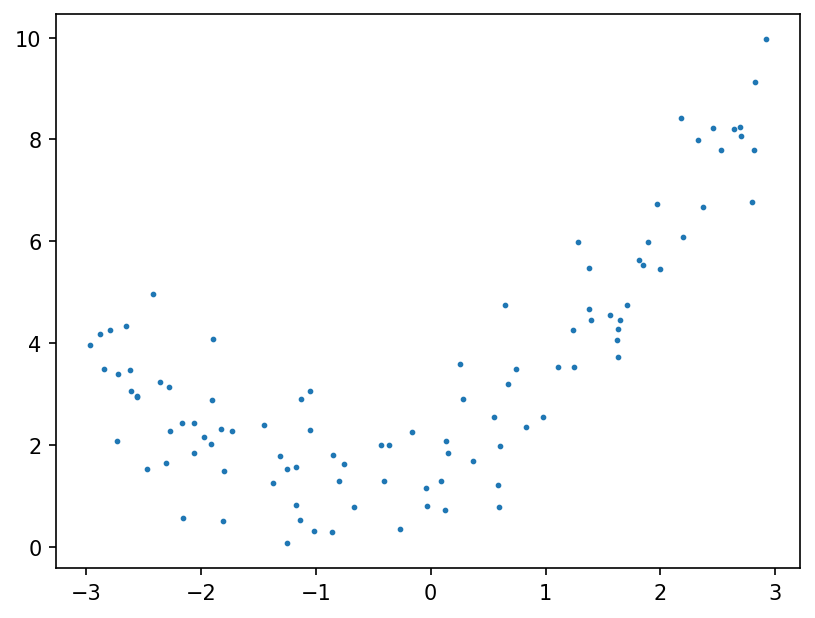

In [2]:
# 需要拟合的图案是一个加上噪声的抛物线
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.figure(dpi=150)
plt.scatter(X,y,s=3)

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

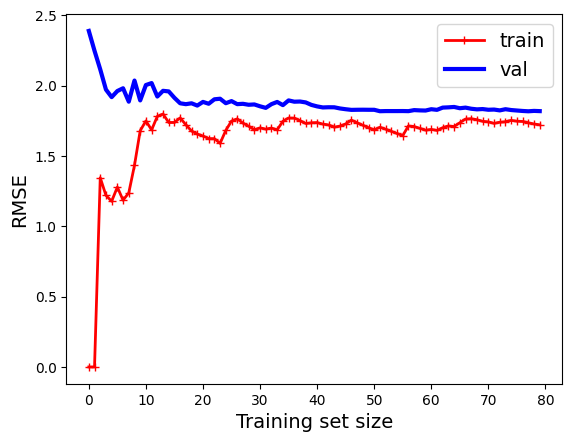

In [4]:
# 构建线性模型
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

这种欠拟合的模型值得解释一下。首先，让我们看一下在训练数据
上的性能:当训练集中只有一个或两个实例时，模型可以很好地拟合它
们，这就是曲线从零开始的原因。但是，随着将新实例添加到训练集
中，模型就不可能完美地拟合训练数据，这既因为数据有噪声，又因为
它根本不是线性的。因此，训练数据上的误差会一直上升，直到达到平
稳状态，此时在训练集中添加新实例并不会使平均误差变好或变差。现
在让我们看一下模型在验证数据上的性能。当在很少的训练实例上训练
模型时，它无法正确泛化，这就是验证误差最初很大的原因。然后，随
着模型经历更多的训练示例，它开始学习，因此验证错误逐渐降低。但
是，直线不能很好地对数据进行建模，因此误差最终达到一个平稳的状
态，非常接近另外一条曲线。


(0.0, 80.0, 0.0, 3.0)

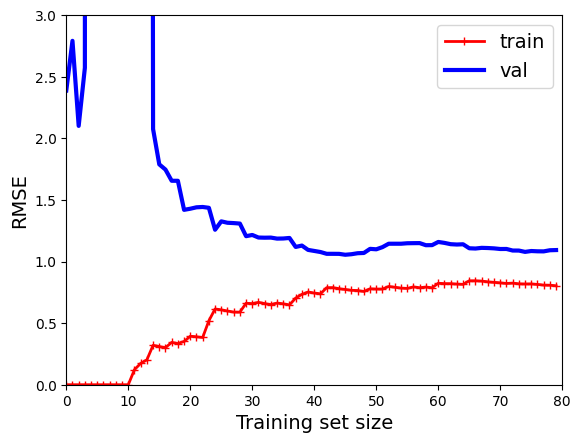

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # x:0-80 y:0-3



 这些学习曲线看起来有点像以前的曲线，但是有两个非常重要的区
别:
  
  ·与线性回归模型相比，训练数据上的误差要低得多。
  
  
  ·曲线之间存在间隙。这意味着该模型在训练数据上的性能要比在
验证数据上的性能好得多，这是过拟合模型的标志。但是，如果你使用
更大的训练集，则两条曲线会继续接近。
